In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## linear regression

In [3]:
# In practice, it is simpler to minimize the Mean Square Error (MSE)
# than the RMSE, and it leads to the same result (because the value that minimizes a
# function also minimizes its square root).

In [4]:
# Mse cost function of a linear regression model :
#     MSE(X, hO) = 1/m * (O.T * X - y)^2
# yk..

In [5]:
# the normal equatoin :
# O = (X.T * X)^-1 * X.T * y
# yk..

In [6]:
# generating some linear data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X.shape, y.shape

((100, 1), (100, 1))

In [7]:
# Now let’s compute θ using the Normal Equation. We will use the inv() function from
# NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and
# the dot() method for matrix multiplication: 

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_b.shape, theta_best.shape, theta_best

((100, 2),
 (2, 1),
 array([[4.05770481],
        [2.81748456]]))

In [8]:
# The actual function that we used to generate the data is y = 4 + 3x1 + Gaussian noise.
# Let’s see what the equation found:
theta_best
# We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.215 and θ1 = 2.770. Close
# enough, but the noise made it impossible to recover the exact parameters of the original
# function.

array([[4.05770481],
       [2.81748456]])

In [9]:
# Now you can make predictions using θ:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict, X_new, X_new_b

(array([[4.05770481],
        [9.69267393]]),
 array([[0],
        [2]]),
 array([[1., 0.],
        [1., 2.]]))

In [10]:
# explanation... of all above here

# first we made X and y,, i.e. points. as u see below 
# as you know the equation for linear regression i.e. y=(theta0) + (theta1)x
# so we used normal equation to calculate theta.. ok fine till now
# then X_new are the points on which we wanna calculate the prediction .. i.e. on points 0 and 2
# so we just gotta multiply these with theta but,,,, we also gotta add 1 so we can multiply it with theta0
# then new matrix X_new_b is same as X_new but just with extra 1 for theta0
# then we predict y_predict by multiplying these 2.
# and at end we just plot these..


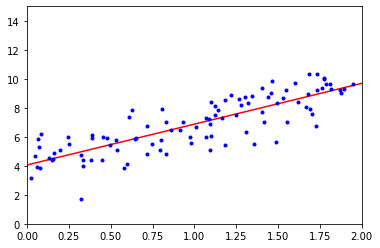

In [11]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## performing linear regression using scikit-learn

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.05770481]), array([[2.81748456]]))

In [13]:
# data for plotting line (prediction)
X_predict_1 = lin_reg.predict([[0]])
X_predict_2 = lin_reg.predict([[2]])
X_predict_1, X_predict_2

(array([[4.05770481]]), array([[9.69267393]]))

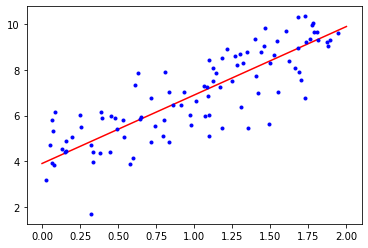

In [14]:
# this is the data
# this might not be the best way to do this,, but for now.. it's ok
plt.plot([0,2], [3.9, 9.9], "r-")
# we need 2 points to plot line.. so . 
plt.plot(X, y, "b.") 

In [15]:
# The LinearRegression class is based on the scipy.linalg.lstsq() function (the
# name stands for “least squares”), which you could call directly:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd, residuals, rank, s

(array([[4.05770481],
        [2.81748456]]),
 array([111.58159759]),
 2,
 array([14.75492629,  3.81820652]))

In [16]:
# This function computes θ = X+y, where X+ is the pseudoinverse of X (specifically the
# Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse
# directly:
# >>> np.linalg.pinv(X_b).dot(y)
# array([[4.21509616],
# [2.77011339]])

# just read page->119

# The pseudoinverse itself is computed using a standard matrix factorization technique
# called Singular Value Decomposition (SVD)

# This approach is more efficient than computing the
# Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may
# not work if the matrix XTX is not invertible (i.e., singular), such as if m < n or if some
# features are redundant, but the pseudoinverse is always defined.

# read pages-> upto 119

# Computational Complexity

In [17]:
# Warning :
# Both the Normal Equation and the SVD approach get very slow
# when the number of features grows large (e.g., 100,000). On the
# positive side, both are linear with regards to the number of instances
# in the training set (they are O(m)), so they handle large training
# sets efficiently, provided they can fit in memory.

# yk the normal equation's time.. as it computes the inverse of 
# X.T * X which is an (n + 1) X (n + 1) matrix

## Gradient descent

In [18]:
# An important parameter in Gradient Descent is the size of the steps, determined by
# the learning rate hyperparameter.

In [19]:
# Linear Regression model happens to be a
# convex function, which means that if you pick any two points on the curve, the line
# segment joining them never crosses the curve. This implies that there are no local
# minima, just one global minimum.

## Batch gradient descent 

In [20]:
# Notice that this formula involves calculations over the full training
# set X, at each Gradient Descent step! This is why the algorithm is
# called Batch Gradient Descent: it uses the whole batch of training
# data at every step (actually, Full Gradient Descent would probably
# be a better name). As a result it is terribly slow on very large training
# sets (but we will see much faster Gradient Descent algorithms
# shortly). However, Gradient Descent scales well with the number of
# features; training a Linear Regression model when there are hundreds
# of thousands of features is much faster using Gradient
# Descent than using the Normal Equation or SVD decomposition.

# page->124

In [21]:
# now yk
# theta = theta - (learning rate)(derivative)

In [22]:
# quick implementation
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)
print(theta)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients
    
theta, X[:5], X_b[:5]

[[ 0.59706817]
 [-0.65285567]]


(array([[4.05770481],
        [2.81748456]]),
 array([[1.40286095],
        [0.32103965],
        [0.57867295],
        [1.87010309],
        [0.71540941]]),
 array([[1.        , 1.40286095],
        [1.        , 0.32103965],
        [1.        , 0.57867295],
        [1.        , 1.87010309],
        [1.        , 0.71540941]]))

In [23]:
# To find a good learning rate, you can use grid search (see Chapter 2). However, you
# may want to limit the number of iterations so that grid search can eliminate models
# that take too long to converge.

# You may wonder how to set the number of iterations. If it is too low, you will still be
# far away from the optimal solution when the algorithm stops, but if it is too high, you
# will waste time while the model parameters do not change anymore. A simple solution
# is to set a very large number of iterations but to interrupt the algorithm when the
# gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny
# number ϵ (called the tolerance)—because this happens when Gradient Descent has
# (almost) reached the minimum.

## stochastic gradient descent

In [24]:
# Stochastic Gradient Descent just
# picks a random instance in the training set at every step and computes the gradients
# based only on that single instance.

# this makes it faster but it keep on bouncing up and down
# so once the algorithm stops, the final parameter values are good, but no optimal

# page->126

In [25]:
# When the cost function is very irregular (as in Figure 4-6), this can actually help the
# algorithm jump out of local minima, so Stochastic Gradient Descent has a better
# chance of finding the global minimum than Batch Gradient Descent does.

# Therefore randomness is good to escape from local optima, but bad because it means
# that the algorithm can never settle at the minimum. One solution to this dilemma is
# to gradually reduce the learning rate. The steps start out large (which helps make
# quick progress and escape local minima), then get smaller and smaller, allowing the
# algorithm to settle at the global minimum. This process is akin to simulated annealing,
# an algorithm inspired from the process of annealing in metallurgy where molten
# metal is slowly cooled down. The function that determines the learning rate at each
# iteration is called the learning schedule. If the learning rate is reduced too quickly, you
# may get stuck in a local minimum, or even end up frozen halfway to the minimum. If
# the learning rate is reduced too slowly, you may jump around the minimum for a
# long time and end up with a suboptimal solution if you halt training too early.

In [26]:
# implementation using simple learning shedule

n_epochs = 50
t0, t1 = 5, 50 # learning shedule hyperparameters
def learning_schedule(t):
    return t0/ (t1 + t)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # see we used only 1 x, rather then the whole training set..
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [27]:
# By convention we iterate by rounds of m iterations; each round is called an epoch.
# While the Batch Gradient Descent code iterated 1,000 times through the whole training
# set, this code goes through the training set only 50 times and reaches a fairly good
# solution:

In [28]:
# i think it is a good option to shuffle every time.. see page->128

In [29]:
# The following implements the linear regression using sgdregression class
# code runs for maximum 1000 epochs (max_iter=1000) or until the loss drops
# by less than 1e-3 during one epoch (tol=1e-3), starting with a learning rate of 0.1
# (eta0=0.1), using the default learning schedule (different from the preceding one),
# and it does not use any regularization (penalty=None; more details on this shortly):

In [30]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

# tolerance is here for when the loss drops by less than 12-3
# eta = starting learning rate

SGDRegressor(eta0=0.1, penalty=None)

In [31]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.00353301]), array([2.80326195]))

## Mini-batch gradient descent

In [31]:
# It is quite simple to understand once you know Batch and Stochastic Gradient
# Descent: at each step, instead of computing the gradients based on the full training
# set (as in Batch GD) or based on just one instance (as in Stochastic GD), Minibatch
# GD computes the gradients on small random sets of instances called minibatches.
# The main advantage of Mini-batch GD over Stochastic GD is that you can
# get a performance boost from hardware optimization of matrix operations, especially
# when using GPUs.

In [32]:
# There is almost no difference after training: all these algorithms
# end up with very similar models and make predictions in exactly
# the same way.
# there is also a graph.. see page->129

## polynomial regresson 

In [33]:
# What if your data is actually more complex than a simple straight line? Surprisingly,
# you can actually use a linear model to fit nonlinear data. A simple way to do this is to
# add powers of each feature as new features, then train a linear model on this extended
# set of features. This technique is called Polynomial Regression.

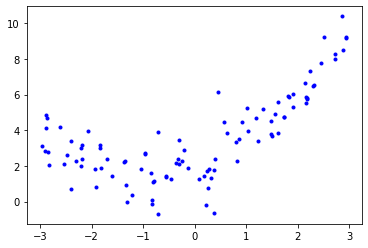

In [34]:
# generating some non-linear data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
# do check out the difference between .rand and .randn
plt.plot(X, y, "b.")

In [35]:
# Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly
# nomialFeatures class to transform our training data, adding the square (2nd-degree
# polynomial) of each feature in the training set as new features (in this case there is
# just one feature):

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0], X_poly[:4]

# Note that min_degree=0 and min_degree=1 are equivalent as outputting the degree zero term is determined by include_bias.
# taken from docs..

(array([1.49267989]),
 array([1.49267989, 2.22809324]),
 array([[ 1.49267989,  2.22809324],
        [ 1.22288128,  1.49543863],
        [-2.89104256,  8.35812709],
        [-2.53126876,  6.40732153]]))

In [37]:
# X_poly now contains the original feature of X plus the square of this feature. Now you
# can fit a LinearRegression model to this extended training data
X_poly[:5], X[:5]

(array([[ 1.49267989,  2.22809324],
        [ 1.22288128,  1.49543863],
        [-2.89104256,  8.35812709],
        [-2.53126876,  6.40732153],
        [ 2.50208638,  6.26043623]]),
 array([[ 1.49267989],
        [ 1.22288128],
        [-2.89104256],
        [-2.53126876],
        [ 2.50208638]]))

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.95148029]), array([[0.95408058, 0.52489357]]))

In [39]:
## data for plotting
lin_reg.predict([[-3, 9]]), lin_reg.predict([[3, 9]])
# we gotta pass x and x^2 to predict function
X_temp = [[-3, 9], [3, 9], [0, 0]]
y_temp = [2.1 + 1.01*x + 0.43*y for x, y in X_temp]
X_temp, y_temp

([[-3, 9], [3, 9], [0, 0]], [2.94, 9.0, 2.1])

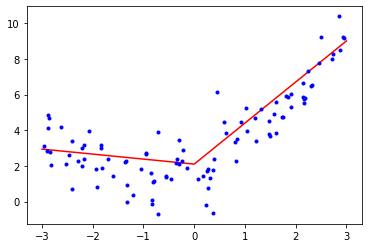

In [40]:
plt.plot([-3, 0, 3], [2.94, 2.1, 9.0], "r-")
# I am just taking only 3 points so the line looks like this.. i will improve .. the plot.. later..😅
plt.plot(X, y, "b.")

In [41]:
# plt.plot(X, y, "b.")
# z = lin_reg.coef_[0,0]*(X**2)+ lin_reg.coef_[0,1]*X + lin_reg.intercept_
# plt.plot(z)
# plt.plot(lin_reg.intercept_*X, lin_reg.coef_*y, "b.")

In [42]:
# Note that when there are multiple features, Polynomial Regression is capable of finding
# relationships between features (which is something a plain Linear Regression
# model cannot do). This is made possible by the fact that PolynomialFeatures also
# adds all combinations of features up to the given degree. For example, if there were
# two features a and b, PolynomialFeatures with degree=3 would not only add the
# features a2, a3, b2, and b3, but also the combinations ab, a2b, and ab2.

## learning curves

In [43]:
# function that plots the learning curves of a model given some training data
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

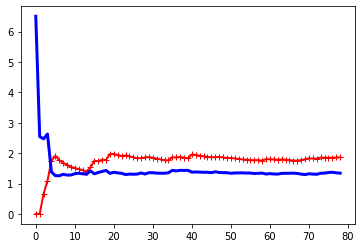

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
plot_learning_curves(lin_reg, X, y)
# idk what happned see page->134

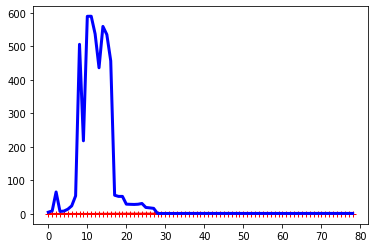

In [45]:
# if a model is underfitting the training data, adding more training 
# examples will not help so .. instead use a more complex model
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)
# better see page->135

In [46]:
# one way to improve an overfitting model is to feed it more training
# data until the validation error reaches the training error

In [47]:
# bias/variance tradeoff page->136

## regularized linear model

In [48]:
# a good way to reduce overfitting is to regularize the model..
# We will now look at Ridge Regression, Lasso Regression, and Elastic Net,
# which implement three different ways to constrain the weights.

## ridge regression

In [49]:
# a regularization term: (alpha)E(theta)^2 is added to cost function
# The hyperparameter α controls how much you want to regularize the model. If α = 0
# then Ridge Regression is just Linear Regression. If α is very large, then all weights end
# up very close to zero and the result is a flat line going through the data’s mean. Equation
# 4-8 presents the Ridge Regression cost function.

# j(theta) = MSE(theta) + (alpha)*1/2*E(theta)^2

# WARNING: 
#     It is important to scale the data (e.g., using a StandardScaler)
# before performing Ridge Regression, as it is sensitive to the scale of
# the input features. This is true of most regularized models.

In [50]:
# do check out page->138 shows graphs,, and differences

# As with Linear Regression, we can perform Ridge Regression either by computing a
# closed-form equation or by performing Gradient Descent. The pros and cons are the
# same. Equation 4-9 shows the closed-form solution (where A is the (n + 1) × (n + 1)
# identity matrix13 except with a 0 in the top-left cell, corresponding to the bias term).

In [51]:
# ridge regression closed_form
# Equation 4.9
# (theta) = (X.T * x + (alpha)A)^-1 * X.T * y

In [52]:
# Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solution
# (a variant of Equation 4-9 (see above) using a matrix factorization technique by André-Louis
# Cholesky):

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.88708971]])

In [53]:
# now using Stochastic Gradient Descent
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
# ravel flattens the array.. see docs
sgd_reg.predict([[1.5]])

# The penalty hyperparameter sets the type of regularization term to use. Specifying
# "l2" indicates that you want SGD to add a regularization term to the cost function
# equal to half the square of the ℓ2 norm of the weight vector: this is simply Ridge
# Regression.


array([4.87441198])

## Lasso Regression 

In [54]:
# just like Ridge
# Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm
# of the weight vector instead of half the square of the ℓ2 norm

# j(theta) = MSE(theta) + (alpha)E|theta|

# see page->140

# An important characteristic of Lasso Regression is that it tends to completely eliminate
# the weights of the least important features (i.e., set them to zero). For example,
# the dashed line in the right plot on Figure 4-18 (with α = 10-7) looks quadratic, almost
# linear: all the weights for the high-degree polynomial features are equal to zero. In
# other words, Lasso Regression automatically performs feature selection and outputs a
# sparse model (i.e., with few nonzero feature weights).

In [55]:
# The Lasso cost function is not differentiable at θi = 0 (for i = 1, 2, ⋯, n), but Gradient
# Descent still works fine if you use a subgradient vector g15 instead when any θi = 0.
# Equation 4-11 shows a subgradient vector equation you can use for Gradient Descent
# with the Lasso cost function.

# example using a lasso class
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([4.84105421])

## Elastic net

In [56]:
# The
# regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
# and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
# Regression, and when r = 1, it is equivalent to Lasso Regression

# the cost function is also a mix of 2 you can see page->142


In [57]:
# example

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])



array([4.84439275])

## early stopping

In [58]:
# A very different way to regularize iterative learning algorithms such as Gradient
# Descent is to stop training as soon as the validation error reaches a minimum. This is
# called early stopping.
# page->143

In [59]:
# # Here is a basic implementation of early stopping:
# from sklearn.base import clone
# from sklearn.preprocessing import StandardScaler
# # prepare the data
# poly_scaler = Pipeline([
# ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
# ("std_scaler", StandardScaler())
# ])
# X_train_poly_scaled = poly_scaler.fit_transform(X_train)
# X_val_poly_scaled = poly_scaler.transform(X_val)
# sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
# penalty=None, learning_rate="constant", eta0=0.0005)
# minimum_val_error = float("inf")
# best_epoch = None
# best_model = None
# for epoch in range(1000):
#     sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
#     y_val_predict = sgd_reg.predict(X_val_poly_scaled)
#     val_error = mean_squared_error(y_val, y_val_predict)
#     if val_error < minimum_val_error:
#         minimum_val_error = val_error
#         best_epoch = epoch
#         best_model = clone(sgd_reg)
        
# Note that with warm_start=True, when the fit() method is called, it just continues
# # training where it left off instead of restarting from scratch.

# Logistic regression

In [60]:
# page->144
# there is no Normal Equation for this..but the cost function is convex
# so gradient descent is guaranteed to find the global minimum

# Once you have the gradient vector containing all
# the partial derivatives you can use it in the Batch Gradient Descent algorithm. That’s
# it: you now know how to train a Logistic Regression model. For Stochastic GD you
# would of course just take one instance at a time, and for Mini-batch GD you would
# use a mini-batch at a time.


## Decision boundaries

In [75]:
# Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal
# width feature.

from sklearn import datasets
iris = datasets.load_iris()

X = iris["data"][:, 3:] # petal width
y = (iris["target"]==2).astype(int) # 1 if Iris-Virginica, else 0

list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [81]:
X.shape, y.shape
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [62]:
# train
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Text(0, 0.5, 'probability (iris-virginica)')

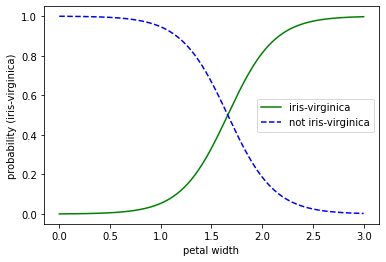

In [92]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # -1 indicates unknown dimension
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="iris-virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="not iris-virginica")
plt.legend()
plt.xlabel("petal width")
plt.ylabel("probability (iris-virginica)", rotation ="vertical")
# y_proba[:, 1]

In [93]:
X_new.shape

(1000, 1)

In [94]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

## softmax regression

In [65]:
# The Logistic Regression model can be generalized to support multiple classes directly,
# without having to train and combine multiple binary classifiers.
# This is called Softmax Regression, or Multinomial Logistic Regression.

# The idea is quite simple: when given an instance x, the Softmax Regression model
# first computes a score sk(x) for each class k, then estimates the probability of each
# class by applying the softmax function (also called the normalized exponential) to the
# scores. The equation to compute sk(x) should look familiar, as it is just like the equation
# for Linear Regression prediction

# s.. = X.T * (theta)^(k)

In [66]:
# page->149 to 152

# The Softmax Regression classifier predicts only one class at a time
# (i.e., it is multiclass, not multioutput) so it should be used only with
# mutually exclusive classes such as different types of plants. You
# cannot use it to recognize multiple people in one picture.

In [67]:
# Let’s use Softmax Regression to classify the iris flowers into all three classes.
# Scikit-
# Learn’s LogisticRegression uses one-versus-all by default when you train it on more
# than two classes, but you can set the multi_class hyperparameter to "multinomial"
# to switch it to Softmax Regression instead. You must also specify a solver that supports
# Softmax Regression, such as the "lbfgs" solver (see Scikit-Learn’s documentation
# for more details). It also applies ℓ2 regularization by default, which you can
# control using the hyperparameter C.


X = iris["data"][:, (2, 3)] # Petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)


LogisticRegression(C=10, multi_class='multinomial')

In [68]:
print(softmax_reg.predict([[5, 2]]))
softmax_reg.predict_proba([[5, 2]])

[2]


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])